$$
\newcommand{theorem}{\textbf{Theorem: }}
\newcommand{proof}{\textbf{Proof: }}
\newcommand{example}{\textbf{Example: }}
\newcommand{lemma}{\textbf{Lemma: }}
\newcommand{corollary}{\textbf{Corollary: }}
\newcommand{prop}{\textbf{Proposition: }}
$$

$$
\newcommand{v}{\mathbf}
\newcommand{inv}{^{-1}}
\newcommand\mat[1]{\begin{pmatrix}#1\end{pmatrix}} 
\newcommand\det[1]{\left| #1\right|} 
\newcommand\norm[1]{\lVert #1\rVert} 
\newcommand\set[1]{\left\{#1\right\}} 
\newcommand\dels[2]{\frac{\partial #1}{\partial #2}} 
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Laplace transform

Given a function $f$ that is defined for all $t \geq 0$, the **laplace transform** is given by:
$$
F(s) = L(f) = \int ^ \infty _ 0 e^{-st} f(t) dt
$$
assuming the integral exists.

Note that the Laplace transform turns a function of $t$ to a function of $s$.

See also: They are similar to the [Fourier transform](../signal_processing/fourier_transform.ipynb), which turns function of $t$ to $f$ (frequency).

We denote the inverse transform as:
$$
L^{-1} F(s) = f(t)
$$

(We denote original functions with lower case while Laplace transforms by upper case)



<details>
<summary style=\color: blue\>$\example$ (Click to expand)</summary>
<div style=\background: aliceblue\>
Given $f(t) = e^{2t}$.

Then
$$
\begin{align*}
F(s) &= \int ^ \infty _0 e^{-st} e^{2t} dt$ \\
&= \int ^ \infty _0 e^{(2-s)t} dt$ \\
&= \lim _{b \to \infty} \int ^ b _0 e^{(2-s)t} dt$ \\
&= 
\begin{cases}
b & \text{if } s = 2 \\
\frac{e^{(2-s)t}}{2 -s} - \frac{1}{2 - s} & \text{if } s \neq 2 \\
\end{cases}
\end{align*}
$$

When $s \leq 2$, the value diverges, and thus the Laplace transform is not well-defined.

When $s > 2$, the value converges to $\frac{1}{s- 2}$.
Thus, the Laplace transform (for $s > 2)$ is: 
$$
F(s) = \frac{1}{s-2} \quad s > 2
$$
</div>
</details>

$\theorem$

Laplace transforms and their inverses are linear

$$
L(a f(t) + b g(t)) = a L(f) + b L (g)
$$

$$
L^{-1}(a F(s) + b G(s)) = a L^{-1}(F) + b L^{-1} (G)
$$

This is a rather significant property because it makes manipulating the Laplace expressions easier.

## Table of Laplace transforms

|$f(t)$ | $F(s)$ |
|---|---|
| $e^{at}$ | $\frac{1}{s-a} \quad s > a$ |
| $1$ | $\frac{1}{s} \quad s > 0$ |
| $\cos wt$ | $\frac{s}{s^2 + w^2}$ |
| $\sin wt$ | $\frac{w}{s^2 + w^2}$ |
| $t^n$ | $\frac{n!}{s^{n+1}}$ |
| [$u(t-a)$](#Unit-step-function) | $\frac{e^{-as}}{s}$ |
| [$\delta(t)$](#Dirac-delta-function) | $1$ |

<details>
<summary style=\color: blue\>$\textbf{Derivation}$ (Click to expand)</summary>
<div style=\background: aliceblue\>
(1) can be proven similarly using the first example.

(2) can be proven as a special case of (1) when $a=0$.

For (3) and (4), we set $a = iw$, then we get:
$$
\displaylines{
f(t) = e^{iwt} = \cos wt + i \sin t \\
F(s) = \frac{1}{s-iw} = \frac{s + iw}{s^2 + w^2}
}
$$

For (5), we solve it directly:
$$
\begin{align*}
L(t^n) &= \int ^ \infty _0 e^{-st} t^n dt \\
&= -\left[ \frac{1}{s}e^{-st}t^n \right] ^\infty _0 + \frac{n}{s} \int ^ \infty _0 e^{-st} t^{n-1} dt \\
&= \frac{n}{s} \int ^ \infty _0 e^{-st} t^{n-1} dt \\
\end{align*}
$$

From here, we can prove it by induction.

The other identities are proven in their respective sections.
</div>
</details>

## Piecewise continuous functions

Since Laplace transforms are defined by integration, the functions need not be continuous; which cannot be said for differentiation.

A **jump continuity** at $a \in [0, \infty)$ for a function $f$ with $t \geq 0$, is if these limits exists:
$$
\lim _{t \to a^-} f(t) = l _- \quad \lim _{t \to a^+} f(t) = l_+
$$
but $f$ is not continuous at $t=a$.

A function is **piecewise continuous** if it has no other continuities other than jump continuities in the interval.

They always have simple Laplace transforms, unless they grow faster than exponentially.

## Derivatives and integrals

$\theorem$
If $f(t)$ is continuous on $t \geq 0$ and $f'(t)$ is piecewise continuous on $t \geq 0$, then:
$$
L(f'(t)) = sL(f) - f(0), \quad s > a
$$

In general,

$\theorem$
$$
L(f^{n}) = s^n L(f) - s^{n-1} f(0) - s^{n-2} f'(0) - \dots - f^{n-1}(0)
$$

Notice that differentiation of $f$ becomes a multiplication of $F$ by $s$.

$\theorem$

If $f$ is piecewise continuous and has a well-defined Laplace transform, then:
$$
\frac{1}{s} L(f) = L \int ^ t _ 0 \left( f(\tau) d \tau \right), \quad s > 0
$$

Notice that integration of $f$ becomes a division of $F$ by $s$.


<details>
<summary style=\color: blue\>$\example$ (Click to expand)</summary>
<div style=\background: aliceblue\>
Suppose that we wish to find $L^{-1} \frac{1}{s(s^2 + 1)}$

We know that
$$
L(\sin t) = \frac{1}{s^2 + 1}
$$

Using our theorem, we get:
$$
\begin{align*}
L\left( \frac{1}{s(s^2 + 1)}\right) &= L \int ^ t _ 0 \left( \sin \tau d \tau \right) \\
&= L \left( \left[ -\cos \right] ^t _0 \right) \\
&= L \left( 1 - \cos t \right) 
\end{align*}
$$

Thus, $L^{-1} \frac{s}{s(s^2 + 1)} = 1 - \cos t$

Indeed, we can verify this, since we know
$$
L(\cos t) = \frac{s}{s^2 + 1}, \quad L(1) = \frac{1}{s}
$$

Hence,
$$
L(1 - \cos t) = \frac{1}{s} - \frac{s}{s^2 + 1} = \frac{s^2 + 1 - s^2}{s(s^2 + 1)}
= \frac{1}{s(s^2 + 1)}
$$
</div>
</details>

## Shifting

### $t$-shifting

$\theorem$
$$
L(f(t-a) u(t-a)) = e^{-as} F(s)
$$

where $u(t)$ is the [unit step function](#Unit-step-function).

$\corollary$
$$
L(u(t-a)) = \frac{e^{-as}}{s}
$$

#### Unit step function

The **unit step** function is defined as:
$$
u(t - a) =
\begin{cases}
0 \quad t < a \\
1 \quad t \geq a \\
\end{cases}
$$


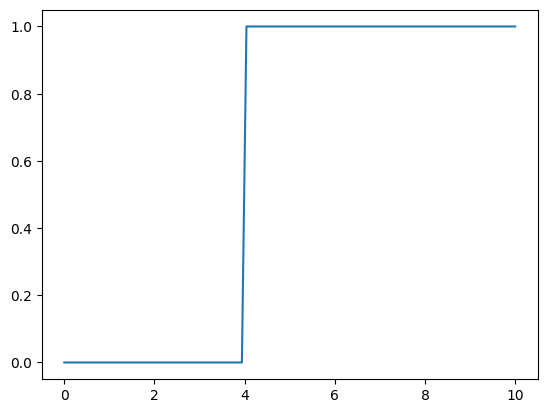

In [2]:
ts = np.linspace(0, 10, num=100)
a = 4
plt.plot(ts, np.where(ts < a, 0, 1))
plt.show()

This function does appear frequently in real life, such as the behaviour of voltage when turning on a switch.

Since this function is discontinuous, we have issues integrating it.
However, if we use the Laplace transform, it wouldn't be an issue.



### $s$-shifting

$\theorem$
If $f$ has a Laplace transform for $s > a$, then:
$$
F(s - c) = L(e^{ct}{f(t)}), \quad s > a + c
$$

This gives us the following more general identities:
$$
\begin{gather*}
L(e^{ct} t^n) = \frac{n!}{(s-c)^{n+1}} \\
L(e^{ct} \cos \omega t) = \frac{s-c}{(s-c)^2 + \omega^2} \\
L(e^{ct} \sin \omega t) = \frac{\omega}{(s-c)^2 + \omega^2} 
\end{gather*}
$$



## Application in differential equations

The Laplace transforms can make solving second order differential equations easier for us.

This uses the properties that differentiation and integration on $f$ becomes multiplication and division on $F$ respectively.
We compute the Laplace transform, then perform simple algebraic manipulation before finally performing the inverse to obtain our result.

Consider:
$$
y'' + ay' + by = r(t)
$$

with the following initial values:
$$
y(0) = k_0 \quad y'(0) = k_1
$$

Taking Laplace transforms on both sides, we get:
$$
s^2 Y - sy(0) - y'(0) + a(sY - y(0)) + bY = R 
= s^2 Y - sk_0 - k_1 + a(sY - k_0) + bY = R 
$$

Rearranging:
$$
Y = \frac{(s+a) k_0 + k_1 + R}{s^2 + as + b}
$$

We then split it into sum of fractions of whose inverses we can find.

Then lastly, $y$ is simply the sum of the inverses.


<details>
<summary style=\color: blue\>$\example$ (Click to expand)</summary>
<div style=\background: aliceblue\>
Suppose that we wish to solve for:
$$
y'' + y = e^{2t}, \quad y(0) = 0, y'(0) = 1
$$

$$
\begin{align*}
R &= F(e^{2t}) = \frac{1}{s-2} \\
Y &=\frac{1 + R}{s^2 + 1} \\
&= \frac{s-1}{(s-2)(s^2+1)} \\
&= \frac{1}{5} \frac{1}{s-2} - \frac{s-3}{5(s^2 + 1)}\\
&= \frac{1}{5} \frac{1}{s-2} - \frac{s}{5(s^2 + 1)} + \frac{3}{5(s^2 + 1)}\\
y &= \frac{1}{5} e^{2t} - \frac{1}{5} \cos t + \frac{3}{5} \sin t\\
\end{align*}
$$
</div>
</details>

### Dirac delta function

The **Dirac delta function** is defined by:
$$
\delta(t) = \lim_{h \to 0} f_h(t) \quad
f_h(t) = 
\begin{cases}
0 & t < 0 \\
\frac{1}{h} & 0 \leq t \leq h \\
0 & t > h \\
\end{cases}
$$

In order words, this is a function with a very large value at $t=0$, but still maintaining the area to be $1$.

Given any function $g(t)$, suppose we consider:
$$
\int ^ \infty _0 f_h(t) g(t) dt = \frac{1}{h} \int ^h _0 g(t) dt
$$

Notice that $h \to 0$, then $\int ^h _0 g(t) dt \to g(0) h$.

Thus, we get the following identity:
$$
\int ^\infty _0 \delta(t) g(t) dt = g(0)
$$

Similarly:
$$
\int ^\infty _0 \delta(t - a) g(t) dt = g(a)
$$

Hence, its Laplace transform is:
$$
L(\delta(t - a)) =  \int ^ \infty _0 e^{-st} \delta(t - a) dt
= e^{-as}
$$

$\corollary$
$$
L(\delta (t)) = 1
$$

Dirac functions are useful in modelling situations where an event occurs at some point in time which perturbs the system.


<details>
<summary style=\color: blue\>$\example$ (Click to expand)</summary>
<div style=\background: aliceblue\>
A patient has 100mg of a medicine at $t=0$.
He is given another 100mg of the same medicine at $t=1$.
Suppose that in the body, the medicine decays to half its value every 1 hour.

We wish to model the amount of medicine in the patient at any time.

Assuming there was no injection, the medicine can be modelled as:
$$
\begin{align*}
y &= y_0 e^{-kt} \\
\frac{1}{2} y_0 &= y_0 e^{-k} \\
k &= \ln 2\\
\end{align*}
$$

Differentiating both sides:
$$
y' = -ky_0 e^{-kt} = -ky
$$

Now, adding in the injection, we get:
$$
y' = -ky + 100\delta(t)
$$

$$
sY - y(0) = -kY + 100e^{-s}
$$

$$
Y = \frac{100e^{-s} + 100}{s+k}
= 100e^{-kt} + 100e^{-k(t-1)} u(t-1)
= 100 (0.5)^t + 100 (0.5)^{t-1} u(t-1)
$$
</div>
</details>

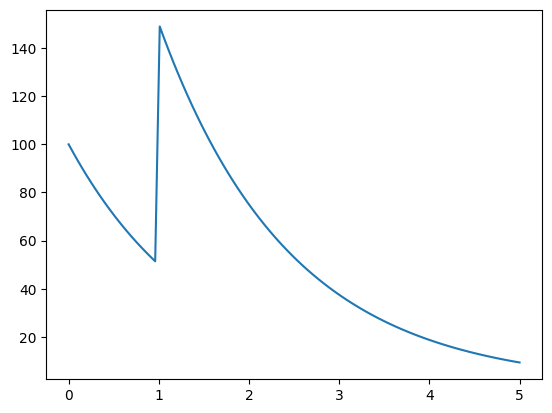

In [3]:
ts = np.linspace(0, 5, num=100)
plt.plot(ts, 100 * 0.5 ** ts + 100 * 0.5 **(ts-1) * np.where(ts-1 <= 0, 0, 1))
plt.show()

Indeed, our equation does describe how the medicine changes over time, even accounting for the injection.
Note that this would be rather difficult to derive without the Laplace transform as we would be dealing with the discontinuity due to the injection.
